___

# _Does Temperature and Population density Affect Covid-19 Spread?_
___

In [1]:
# Dependencies

import pandas as pd
import numpy as np

%matplotlib notebook
%matplotlib inline

from matplotlib import pyplot as plt
from scipy.stats import linregress
import scipy.stats as stats

import requests
import json

# Import api keys for weather and gmaps
from config import (weather_key, g_key, hist_wea_key)

# Import and access maps with API key
import gmaps
gmaps.configure(api_key = g_key)

from datetime import datetime

#import time
#from us import states


In [2]:
# Loading raw Covid-19 data for countries

raw_global_data = pd.read_csv("Resources/Covid19_Global_new.csv")

Covid_global_data = raw_global_data.drop(['Province/State', 'Latitude', 'Longitude'], axis=1)

Covid_global_data = Covid_global_data.groupby('Country').sum()

# Dropping China as it almost reached peak count for this time frame)
Covid_global_data = Covid_global_data.drop(["China"])

# Sorting the data by latest case_count
Covid_global_data = Covid_global_data.sort_values("04/06/2020", ascending = False)

# Selecting top 30 affected countries
Covid_global_data = Covid_global_data.iloc[:31,:]

# Resetting the index 
Covid_global_data.reset_index(inplace = True)

Covid_global_data

,Country,01/22/2020,01/23/2020,01/24/2020,01/25/2020,01/26/2020,01/27/2020,01/28/2020,01/29/2020,01/30/2020,...,03/28/2020,03/29/2020,03/30/2020,03/31/2020,04/01/2020,04/02/2020,04/03/2020,04/04/2020,04/05/2020,04/06/2020
0,US,1,1,2,2,5,5,5,5,5,...,121478,140886,161807,188172,213372,243453,275586,308850,337072,366614
1,Spain,0,0,0,0,0,0,0,0,0,...,73235,80110,87956,95923,104118,112065,119199,126168,131646,136675
2,Italy,0,0,0,0,0,0,0,0,0,...,92472,97689,101739,105792,110574,115242,119827,124632,128948,132547
3,Germany,0,0,0,0,0,1,4,4,4,...,57695,62095,66885,71808,77872,84794,91159,96092,100123,103374
4,France,0,0,2,3,3,3,4,5,5,...,38105,40708,45170,52827,57749,59929,65202,90848,93773,98963
5,Iran,0,0,0,0,0,0,0,0,0,...,35408,38309,41495,44605,47593,50468,53183,55743,58226,60500
6,United Kingdom,0,0,0,0,0,0,0,0,0,...,17312,19780,22453,25481,29865,34173,38689,42477,48436,52279
7,Turkey,0,0,0,0,0,0,0,0,0,...,7402,9217,10827,13531,15679,18135,20921,23934,27069,30217
8,Switzerland,0,0,0,0,0,0,0,0,0,...,14076,14829,15922,16605,17768,18827,19606,20505,21100,21657
9,Belgium,0,0,0,0,0,0,0,0,0,...,9134,10836,11899,12775,13964,15348,16770,18431,19691,20814


In [3]:
# Extracting latitudes and longitudes

countries = raw_global_data["Country"]
latitudes = raw_global_data["Latitude"]
longitudes = raw_global_data["Longitude"]

lat_lng_df = pd.DataFrame({"Country" : countries,
                   "Latitude" : latitudes,
                   "Longitude" : longitudes
                  })
lat_lng_df = lat_lng_df.drop_duplicates("Country")

# Merging the Covid & lat_lng datasets 

Covid_global_data = pd.merge(Covid_global_data,lat_lng_df, on = "Country", how ="left")

Covid_global_data

,Country,01/22/2020,01/23/2020,01/24/2020,01/25/2020,01/26/2020,01/27/2020,01/28/2020,01/29/2020,01/30/2020,...,03/30/2020,03/31/2020,04/01/2020,04/02/2020,04/03/2020,04/04/2020,04/05/2020,04/06/2020,Latitude,Longitude
0,US,1,1,2,2,5,5,5,5,5,...,161807,188172,213372,243453,275586,308850,337072,366614,37.0902,-95.7129
1,Spain,0,0,0,0,0,0,0,0,0,...,87956,95923,104118,112065,119199,126168,131646,136675,40.0000,-4.0000
2,Italy,0,0,0,0,0,0,0,0,0,...,101739,105792,110574,115242,119827,124632,128948,132547,43.0000,12.0000
3,Germany,0,0,0,0,0,1,4,4,4,...,66885,71808,77872,84794,91159,96092,100123,103374,51.0000,9.0000
4,France,0,0,2,3,3,3,4,5,5,...,45170,52827,57749,59929,65202,90848,93773,98963,3.9339,-53.1258
5,Iran,0,0,0,0,0,0,0,0,0,...,41495,44605,47593,50468,53183,55743,58226,60500,32.0000,53.0000
6,United Kingdom,0,0,0,0,0,0,0,0,0,...,22453,25481,29865,34173,38689,42477,48436,52279,32.3078,-64.7505
7,Turkey,0,0,0,0,0,0,0,0,0,...,10827,13531,15679,18135,20921,23934,27069,30217,38.9637,35.2433
8,Switzerland,0,0,0,0,0,0,0,0,0,...,15922,16605,17768,18827,19606,20505,21100,21657,46.8182,8.2275
9,Belgium,0,0,0,0,0,0,0,0,0,...,11899,12775,13964,15348,16770,18431,19691,20814,50.8333,4.0000


### _Extracting temperatures for countries_
___

In [4]:
# Country_temperatures 

base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="

# Retrieving latitudes and longitudes

lats = Covid_global_data["Latitude"]
lngs = Covid_global_data["Longitude"]

lat_lngs = zip(lats, lngs)

# Create a list to store temperatures

temperatures = []

# Aquiring temperatures by making api calls

for lat_lng in lat_lngs:
    
    query_url = f'{base_url}{weather_key}&lat={lat_lng[0]}&lon={lat_lng[1]}'
    
    results = requests.get(query_url).json()
    
    country_temp = results["main"]["temp"]
    
    temperatures.append(country_temp)
    
# Add temperatures to "Temperature" column 

Covid_global_data["Temp(F)"] = temperatures

### _Extracting Population density (Persons per SqKm) for Countries_
___

In [5]:
# Loading raw data for population 
Population_global_data = pd.read_csv("Resources/Population_global_data.csv")

# Extracting required rows and columns from raw data
Population_global_data = Population_global_data.iloc[:, [1,4,7]] 

# Renaming Column names
Population_global_data = Population_global_data.rename(columns={"country": "Country",
                                                                "pop": "Population",
                                                                "density": "Pop_density"
                                                               })

# Dropping duplicate values
Population_global_data = Population_global_data.drop_duplicates(subset = 'Country', keep='first')

# Resetting the index 
Population_global_data.reset_index(inplace = True, drop = True)

Population_global_data

,Country,Population,Pop_density
0,Afghanistan,"38,928,346",60.0
1,Albania,"2,877,797",105.0
2,Algeria,"43,851,044",18.0
3,Andorra,"77,265",164.0
4,Antigua and Barbuda,"97,929",223.0
...,...,...,...
171,Uzbekistan,"33,469,203",79.0
172,Venezuela,"28,435,940",32.0
173,Vietnam,"97,338,579",314.0
174,Zambia,"18,383,955",25.0


In [6]:
# Merge Covid global data and population global data

Covid_global_data = pd.merge(Covid_global_data, Population_global_data, 
                             on = "Country", how = 'left')

# Rearranging columns in the desired order

Covid_global_data = Covid_global_data[["Country","Latitude", "Longitude",
                                       "Temp(F)","Population","Pop_density",
                                       "01/22/2020","01/23/2020","01/24/2020",
                                       "01/25/2020","01/26/2020","01/27/2020",
                                       "01/28/2020","01/29/2020","01/30/2020",
                                       "01/31/2020","02/01/2020","02/02/2020",
                                       "02/03/2020","02/04/2020","02/05/2020",
                                       "02/06/2020","02/07/2020","02/08/2020",
                                       "02/09/2020","02/10/2020","02/11/2020",
                                       "02/12/2020","02/13/2020","02/14/2020",
                                       "02/15/2020","02/16/2020","02/17/2020",
                                       "02/18/2020","02/19/2020","02/20/2020",
                                       "02/21/2020","02/22/2020","02/23/2020",
                                       "02/24/2020","02/25/2020","02/26/2020",
                                       "02/27/2020","02/28/2020","02/29/2020",
                                       "03/01/2020","03/02/2020","03/03/2020",
                                       "03/04/2020","03/05/2020","03/06/2020",
                                       "03/07/2020","03/08/2020","03/09/2020",
                                       "03/10/2020","03/11/2020","03/12/2020",
                                       "03/13/2020","03/14/2020","03/15/2020",
                                       "03/16/2020","03/17/2020","03/18/2020",
                                       "03/19/2020","03/20/2020","03/21/2020",
                                       "03/22/2020","03/23/2020","03/24/2020",
                                       "03/25/2020","03/26/2020","03/27/2020",
                                       "03/28/2020","03/29/2020","03/30/2020",
                                       "03/31/2020","04/01/2020","04/02/2020",
                                       "04/03/2020","04/04/2020","04/05/2020",
                                       "04/06/2020"
                                       ]]

Covid_global_data

,Country,Latitude,Longitude,Temp(F),Population,Pop_density,01/22/2020,01/23/2020,01/24/2020,01/25/2020,...,03/28/2020,03/29/2020,03/30/2020,03/31/2020,04/01/2020,04/02/2020,04/03/2020,04/04/2020,04/05/2020,04/06/2020
0,US,37.0902,-95.7129,85.14,"331,002,651",36.0,1,1,2,2,...,121478,140886,161807,188172,213372,243453,275586,308850,337072,366614
1,Spain,40.0000,-4.0000,57.15,"46,754,778",94.0,0,0,0,0,...,73235,80110,87956,95923,104118,112065,119199,126168,131646,136675
2,Italy,43.0000,12.0000,47.52,"60,461,826",206.0,0,0,0,0,...,92472,97689,101739,105792,110574,115242,119827,124632,128948,132547
3,Germany,51.0000,9.0000,54.41,"83,783,942",240.0,0,0,0,0,...,57695,62095,66885,71808,77872,84794,91159,96092,100123,103374
4,France,3.9339,-53.1258,75.15,"65,273,511",119.0,0,0,2,3,...,38105,40708,45170,52827,57749,59929,65202,90848,93773,98963
5,Iran,32.0000,53.0000,62.17,"83,992,949",52.0,0,0,0,0,...,35408,38309,41495,44605,47593,50468,53183,55743,58226,60500
6,United Kingdom,32.3078,-64.7505,66.20,"67,886,011",281.0,0,0,0,0,...,17312,19780,22453,25481,29865,34173,38689,42477,48436,52279
7,Turkey,38.9637,35.2433,44.60,"84,339,067",110.0,0,0,0,0,...,7402,9217,10827,13531,15679,18135,20921,23934,27069,30217
8,Switzerland,46.8182,8.2275,47.16,"8,654,622",219.0,0,0,0,0,...,14076,14829,15922,16605,17768,18827,19606,20505,21100,21657
9,Belgium,50.8333,4.0000,56.34,"11,589,623",383.0,0,0,0,0,...,9134,10836,11899,12775,13964,15348,16770,18431,19691,20814


## _Scatter plots & Bar Charts_
___

In [7]:
# Storing required values to plot scatter plots and bar graphs

countries = Covid_global_data["Country"]
temperatures = Covid_global_data["Temp(F)"]
Covid_cases = Covid_global_data["04/06/2020"]/1000
pop_density = Covid_global_data["Pop_density"]

### _Scatter plot for Temperature Vs. Covid Cases_
___

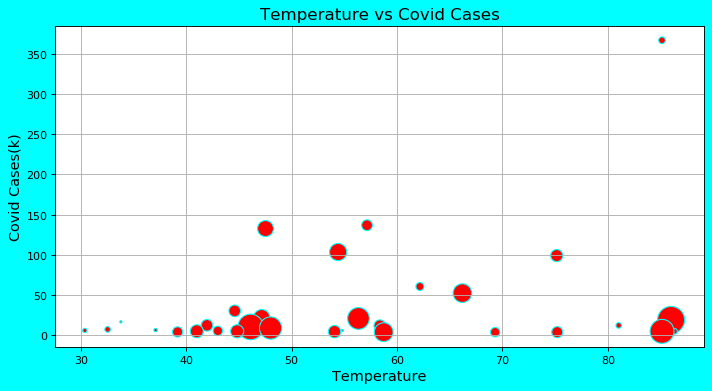

In [8]:
plt.figure(figsize=(9, 5), facecolor = 'cyan', edgecolor = 'b', dpi = 80)

plt.scatter (temperatures, Covid_cases,
             s = pop_density,
             marker="o",
             facecolors="red",
             edgecolors="cyan")

# Incorporate the other graph properties
plt.title("Temperature vs Covid Cases", color = "k", fontsize = 15)

plt.xlabel("Temperature", color = "k", fontsize = 13)
plt.ylabel("Covid Cases(k)", color = "k", fontsize = 13)

#plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

### _Scatter plot for Population Density Vs. Covid Cases_
___

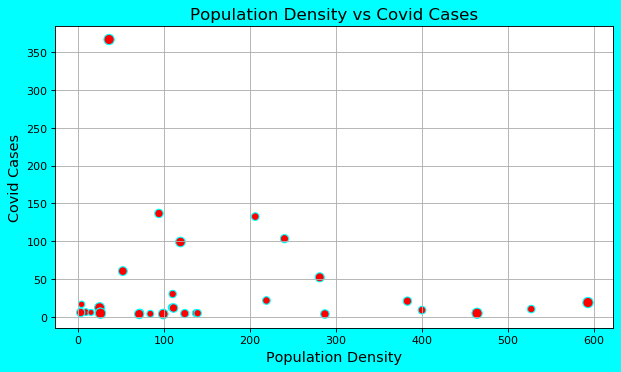

In [9]:
plt.figure(figsize = (9, 5), facecolor = 'cyan', edgecolor = 'b', dpi = 80)

plt.scatter(pop_density, Covid_cases,
             s = temperatures,
             marker = "o", 
             facecolors = "red", 
             edgecolors = "cyan")

# Incorporate the other graph properties

plt.title("Population Density vs Covid Cases", color = "k", fontsize = 15)

plt.xlabel("Population Density", color = "k", fontsize = 13)
plt.ylabel("Covid Cases", color = "k", fontsize = 13)

plt.grid(True)

plt.show()

### _Bar chart Population Densities of countries_
___

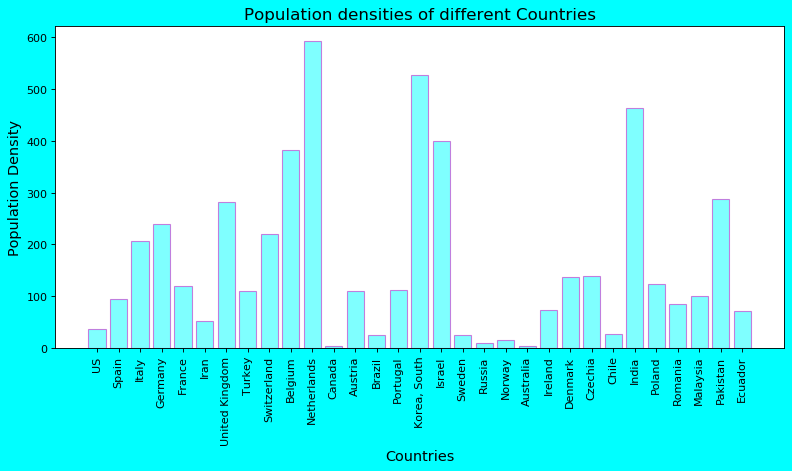

In [10]:
plt.figure(figsize = (10, 6), facecolor = 'cyan', edgecolor = 'b', dpi = 80)

plt.bar(countries, pop_density, color='cyan', edgecolor = 'm', alpha=0.5, align="center")

plt.title("Population densities of different Countries", color = "k", fontsize = 15)

plt.xlabel("Countries", color = "k", fontsize = 13)
plt.ylabel("Population Density", color = "k", fontsize = 13)

plt.xticks(rotation = "vertical")

plt.tight_layout()
plt.show()

### _Bar chart for Covid Cases in different countries_
___

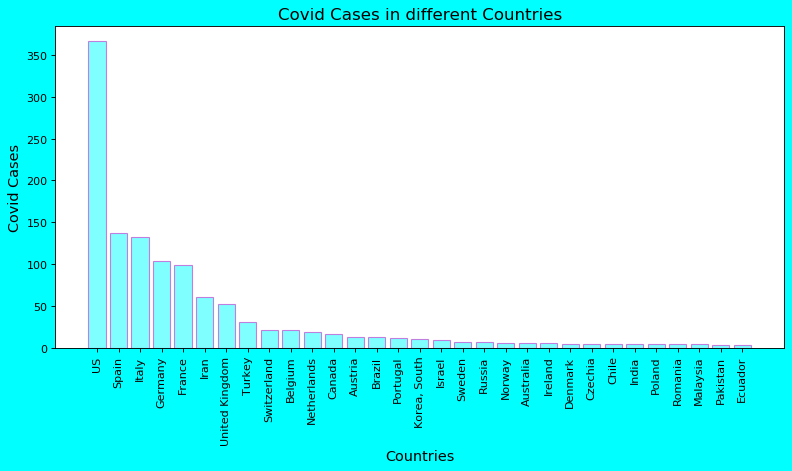

In [11]:
plt.figure(figsize = (10, 6), facecolor = 'cyan', edgecolor = 'b', dpi = 80)

plt.bar(countries, Covid_cases , color='cyan', edgecolor = 'm', alpha=0.5, align="center")

plt.title("Covid Cases in different Countries", color = "k", fontsize = 15)

plt.xlabel("Countries", color = "k", fontsize = 13)
plt.ylabel("Covid Cases", color = "k", fontsize = 13)

plt.xticks(rotation = "vertical")

plt.tight_layout()
plt.show()

___
# _Statistical Analysis for Covid-19 Vs Temperature_
___

In [ ]:
Covid_global_stats = Covid_global_data.melt(id_vars = ["Country","Latitude", "Longitude",
                                                      "Temp(F)","Population","Pop_density"],
                                           
                                           value_vars = ["01/22/2020","01/23/2020","01/24/2020",
                                                         "01/25/2020","01/26/2020","01/27/2020",
                                                         "01/28/2020","01/29/2020","01/30/2020",
                                                         "01/31/2020","02/01/2020","02/02/2020",
                                                         "02/03/2020","02/04/2020","02/05/2020",
                                                         "02/06/2020","02/07/2020","02/08/2020",
                                                         "02/09/2020","02/10/2020","02/11/2020",
                                                         "02/12/2020","02/13/2020","02/14/2020",
                                                         "02/15/2020","02/16/2020","02/17/2020",
                                                         "02/18/2020","02/19/2020","02/20/2020",
                                                         "02/21/2020","02/22/2020","02/23/2020",
                                                         "02/24/2020","02/25/2020","02/26/2020",
                                                         "02/27/2020","02/28/2020","02/29/2020",
                                                         "03/01/2020","03/02/2020","03/03/2020",
                                                         "03/04/2020","03/05/2020","03/06/2020",
                                                         "03/07/2020","03/08/2020","03/09/2020",
                                                         "03/10/2020","03/11/2020","03/12/2020",
                                                         "03/13/2020","03/14/2020","03/15/2020",
                                                         "03/16/2020","03/17/2020","03/18/2020",
                                                         "03/19/2020","03/20/2020","03/21/2020",
                                                         "03/22/2020","03/23/2020","03/24/2020",
                                                         "03/25/2020","03/26/2020","03/27/2020",
                                                         "03/28/2020","03/29/2020","03/30/2020",
                                                         "03/31/2020","04/01/2020","04/02/2020",
                                                         "04/03/2020","04/04/2020","04/05/2020",
                                                         "04/06/2020"],
                                           
                                           var_name='Date',
                                           
                                           value_name='CaseCount')

Covid_global_stats.head(20)

In [ ]:
Covid_grt_Zero= Covid_global_stats[Covid_global_stats['CaseCount'] > 0]

Covid_grt_Zero = Covid_grt_Zero.sort_values(["Country", "CaseCount"], 
                                            ascending = (False, True))

Covid_grt_Zero.head(40)

In [ ]:
Covid_1st = Covid_grt_Zero.groupby(["Country","Latitude","Longitude","Temp(F)","Population","Pop_density"]).first()

Covid_1st = Covid_1st.rename(columns = {"Date" : "1st case reported",
                                        "CaseCount" : "Initial CaseCount"
                                        })

Covid_1st

In [ ]:
Covid_grt_1000 = Covid_global_stats[Covid_global_stats['CaseCount'] > 1000]

Covid_grt_1000 = Covid_grt_1000.sort_values(["Country", "CaseCount"],ascending = (False, True))

Covid_grt_1000.head()

In [ ]:
Covid_1000 = Covid_grt_1000.groupby(["Country","Latitude","Longitude","Temp(F)","Population", "Pop_density"]).first()

Covid_1000 = Covid_1000.rename(columns = {"Date" : "1000 case reported",
                                          "CaseCount" : "1000 CaseCount"
                                         }
                              )

Covid_1000

In [ ]:
Covid_spread = pd.merge(Covid_1st, Covid_1000, 
                        on = ["Country","Latitude","Longitude",
                              "Temp(F)","Population", "Pop_density"])

Covid_spread = Covid_spread.drop(["Initial CaseCount","1000 CaseCount"], axis=1)

Covid_spread

In [ ]:
Covid_grt_2000 = Covid_global_stats[Covid_global_stats['CaseCount'] > 2000]

Covid_grt_2000 = Covid_grt_2000.sort_values(["Country", "CaseCount"],ascending = (False, True))

Covid_2000 = Covid_grt_2000.groupby(["Country","Latitude","Longitude","Temp(F)","Population", "Pop_density"]).first()

Covid_2000 = Covid_2000.rename(columns = {"Date" : "2000 case reported",
                                          "CaseCount" : ">2000 CaseCount"
                                         }
                              )

Covid_2000

In [ ]:
Covid_spread_df = pd.merge(Covid_spread, Covid_2000, 
                        on = ["Country","Latitude","Longitude",
                              "Temp(F)","Population", "Pop_density"])

Covid_spread_df = Covid_spread_df.drop([">2000 CaseCount"], axis=1)

Covid_spread_df

In [ ]:
from datetime import datetime

def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%m/%d/%Y")
    d2 = datetime.strptime(d2, "%m/%d/%Y")
    return abs((d2 - d1).days)


days_diff_1000 = []
days_diff_2000 = []


for ind in Covid_spread_df.index:
    
    x = days_between(Covid_spread_df["1000 case reported"][ind], Covid_spread_df["1st case reported"][ind]) 
    y = days_between(Covid_spread_df["2000 case reported"][ind], Covid_spread_df["1st case reported"][ind]) 
    days_diff_1000.append(x)
    days_diff_2000.append(y)

    
Covid_spread_df["Days took to reach 1000"] = days_diff_1000
    
Covid_spread_df["Days took to reach 2000"] = days_diff_2000

Covid_spread_df = Covid_spread_df.reset_index()

Covid_spread_df

___

# _Anova Oneway Analysis for Temperature Vs Corona Spread_
___

In [ ]:
Covid_spread_df = Covid_spread_df.sort_values(["Temp(F)"])

bins = [30,50,70,101]
groupnames = ["30-50", "50-70", "70-101"]

Covid_spread_df["Temp bins"] = pd.cut(Covid_spread_df["Temp(F)"], bins = bins, labels = groupnames)
Covid_spread_df

In [ ]:
Covid_spread_df.boxplot("Days took to reach 1000",
                        by="Temp bins",
                        figsize=(10, 7),
                        patch_artist = True
                       )

plt.ylabel('Days took to reach 1000', fontsize = 15, color = "m")
plt.xlabel('Temperature Bins', fontsize = 15, color = "m")
plt.title("Temperature vs Covid Spread", pad = 13,fontsize = 17, color = "m")
plt.show()

In [ ]:
# Extract individual groups
group1 = Covid_spread_df[Covid_spread_df["Temp bins"] == "30-50"]["Days took to reach 1000"]
group2 = Covid_spread_df[Covid_spread_df["Temp bins"] == "50-70"]["Days took to reach 1000"]
group3 = Covid_spread_df[Covid_spread_df["Temp bins"] == "70-101"]["Days took to reach 1000"]

# Perform the ANOVA
stats.f_oneway(group1, group2, group3)

___

# Anova One-way Analysis for Population Density vs Covid Spread
Fstatistic > 3.35, pvalue < 0.05
___

In [ ]:
Pop_df = Covid_spread_df.sort_values(["Pop_density"])
Pop_df

In [ ]:
bins = [0,100,300,600]
binnames = ["0-100","101-300","301-600"]

Pop_df["Pop bins"] = pd.cut(Pop_df["Pop_density"], bins = bins, labels = binnames)
Pop_df

In [ ]:
orange_out = dict(markerfacecolor = 'm',markersize = 12)

Pop_df.boxplot("Days took to reach 1000", 
               by="Pop bins", 
               figsize=(10, 7),
               vert = True,
               patch_artist = True,
               flierprops = orange_out)


plt.ylabel('Days took to reach 1000', fontsize = 15, color = "m")
plt.xlabel('Population Density Bins', fontsize = 15, color = "m")
plt.title("Population Density vs Covid Spread", pad = 15,fontsize = 17, color = "m")
plt.show()

In [ ]:
# Extract individual groups
group1 = Pop_df[Pop_df["Pop bins"] == "0-100"]["Days took to reach 1000"]
group2 = Pop_df[Pop_df["Pop bins"] == "101-300"]["Days took to reach 1000"]
group3 = Pop_df[Pop_df["Pop bins"] == "301-600"]["Days took to reach 1000"]

# Perform the ANOVA
stats.f_oneway(group1, group2, group3)